In [6]:
import geopandas as gpd
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2
import pandas as pd
from pyproj import Proj 
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


In [7]:

#files = glob.glob(r'\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALOO_TAGGING_work\drone\surveys\survey_01\*.jpg',recursive=True)



In [10]:
#read image
img = cv2.imread(r'\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALOO_TAGGING_work\drone\surveys\survey_01\neds_20170915T142239_0000.jpg')

#convert from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



In [11]:
#get rgb values from image to 1D array
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()



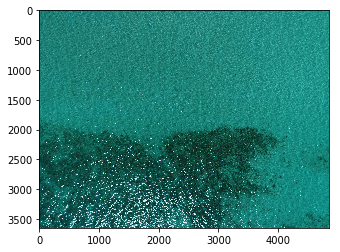

In [14]:
plt.imshow(img)

In [19]:
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

MemoryError: 

In [22]:
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3):
        self.CLUSTERS = clusters
        self.IMAGE = image
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)

img = r'\\oa-osm-01-per.it.csiro.au\OSM_PER_OA_NINGALOO_TAGGING_work\drone\surveys\survey_01\neds_20170915T142239_0000.jpg'
clusters = 5
dc = DominantColors(img, clusters) 
colors = dc.dominantColors()
print(colors)

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\core\src\matrix.cpp:362: error: (-215) u != 0 in function cv::Mat::create
